In [1]:
from IPython.display import Image

### Creating Nodes and Relationships

#### Creating nodes

Recall that a node is an element of a graph representing a domain entity that has zero or more labels, properties, and relationships to or from other nodes in the graph.

**!!!** When you create a node, you can add it to the graph without connecting it to another node.

Here is the simplified syntax for creating a node,

```
CREATE (optionalVariable optionalLabels {optionalProperties})
```

If you plan on referencing the newly created node, you must provide a variable. Whether you provide labels or properties at node creation time is optional. In most cases, you will want to provide some label and property values for a node when created. This will enable you to later retrieve the node. Provided you have a reference to the node (for example, using a `MATCH` clause), you can always add, update, or remove labels and properties at a later time.

Here are some examples of creating a single node in Cypher,

```
CREATE (:Movie {title: 'Batman Begins'})
```

Add a node with two labels to the graph of types Movie and Action with the title Batman Begins. This node can be retrieved using the title. A set of nodes with the labels Movie or Action can also be retrieved which will contain this node,

```
CREATE (:Movie:Action {title: 'Batman Begins'})
```

The variable *m* can be used for later processing after the `CREATE` clause in following query,

```
CREATE (m:Movie:Action {title: 'Batman Begins'})
```

Also, you can see the example about the above situation,

```
CREATE` (m:Movie:Action {title: ' Batman Begins'})
RETURN m.title
```

**!!!** When the graph engine creates a node, it automatically assigns a read-only, unique ID to the node. This is not a property of a node, but rather an internal value.

#### Creating multiple nodes

You can create multiple nodes by simply separating the nodes specified with commas, or by specifying multiple `CREATE` statements.

```
CREATE
(:Person {name: 'Michael Caine', born: 1933}),
(:Person {name: 'Liam Neeson', born: 1952}),
(:Person {name: 'Katie Holmes', born: 1978}),
(:Person {name: 'Benjamin Melniker', born: 1913})
```

**IMPORTANT**

The graph engine will create a node with the same properties of a node that already exists. You can prevent this from happening in one of two ways,

- You can use `MERGE` rather than `CREATE` when creating the node. 
- You can add constraints to your graph.

#### Adding labels to a node

You may not know ahead of time what label or labels you want for a node when it is created. You can add labels to a node using the `SET` clause.

```
// adding one label to node referenced by the variable x
SET x:Label
```

```
// adding two labels to node referenced by the variable x
SET x:Label1:Label2
```

If you attempt to add a label to a node for which the label already exists, the `SET` processing is ignored.

**!!!** Notice here that we call the built-in function, `labels()` that returns the set of labels for the node.

#### Removing labels from a node

```
// remove the label from the node referenced by the variable x
REMOVE x:Label
```

If you attempt to remove a label from a node for which the label does not exist, the `SET` processing is ignored.

```
MATCH (m:Movie:Action)
WHERE m.title = 'Batman Begins'
REMOVE m:Action
RETURN labels(m)
```

#### Adding properties to a node

After you have created a node and have a reference to the node, you can add properties to the node, again using the `SET` keyword.

Here are simplified syntax examples for adding properties to a node referenced by the variable x,

```
SET x.propertyName = value
```

```
SET x.propertyName1 = value1, x.propertyName2 = value2
```

```
SET x = {propertyName1: value1, propertyName2: value2}
```

```
SET x += {propertyName1: value1, propertyName2: value2}
```

**IMPORTANT** 

If the property does not exist, it is added to the node. If the property exists, its value is updated. If the value specified is `null`, the property is removed.

Note that the type of data for a property is not enforced. That is, you can assign a string value to a property that was once a numeric value and visa versa.

When you specify the JSON-style object for assignment (using `=`) of the property values for the node, the object must include all of the properties and their values for the node as the existing properties for the node are overwritten. However, if you specify `+=` when assigning to a property, the value at valueX is updated if the propertyNnameX exists for the node. If the propertyNameX does not exist for the node, then the property is added to the node.

Here is an example where we add the properties released and *lengthInMinutes* to the movie *Batman Begins*,

```
MATCH (m:Movie)
WHERE m.title = 'Batman Begins'
SET m.released = 2005, m.lengthInMinutes = 140
RETURN m
```

Here is another example where we set the property values to the movie node using the JSON-style object containing the property keys and values. Note that all properties must be included in the object.

```
MATCH (m:Movie)
WHERE m.title = 'Batman Begins'
SET  m = {title: 'Batman Begins',
          released: 2005,
          lengthInMinutes: 140,
          videoFormat: 'DVD',
          grossMillions: 206.5}
RETURN m
```

Note that when you add a property to a node for the first time in the graph, the property key is added to the graph. So for example, in the previous example, we added the *videoFormat* and *grossMillions* property keys to the graph as they have never been used before for a node in the graph. Once a property key is added to the graph, it is never removed. When you examine the property keys in the database (by executing `CALL db.propertyKeys()`, you will see all property keys created for the graph, regardless of whether they are currently used for nodes and relationships.

Here is an example where we use the JSON-style object to add the awards property to the node and update the *grossMillions* property,

```
MATCH (m:Movie)
WHERE m.title = 'Batman Begins'
SET  m += {grossMillions: 300,
           awards: 66}
RETURN m
```

#### Removing properties from a node

There are two ways that you can remove a property from a node. One way is to use the REMOVE keyword. The other way is to set the property’s value to `null`.

Here are simplified syntax examples for removing properties from a node referenced by the variable x,

```
REMOVE x.propertyName
```

```
SET x.propertyName = null
```

Suppose we determined that no other Movie node in the graph has the properties, *videoFormat* and *grossMillions*. There is no restriction that nodes of the same type must have the same properties. However, we have decided that we want to remove these properties from this node. Here is example Cypher to remove this property from this *Batman Begins* node,

```
MATCH (m:Movie)
WHERE m.title = 'Batman Begins'
SET m.grossMillions = null
REMOVE m.videoFormat
RETURN m
```

#### Creating relationships

The connections capture the semantic relationships and context of the nodes in the graph.

Here is the simplified syntax for creating a relationship between two nodes referenced by the variables x and y,

```
CREATE (x)-[:REL_TYPE]->(y)
```

```
CREATE (x)<-[:REL_TYPE]-(y)
```

**When you create the relationship, it must have direction**. You can query nodes for a relationship in either direction, but you must create the relationship with a direction. An exception to this is when you create a node using `MERGE` that you will learn about later in this module.

In most cases, unless you are connecting nodes at creation time, you will retrieve the two nodes, each with their own variables, for example, by specifying a `WHERE` clause to find them, and then use the variables to connect them.

Here is an example. We want to connect the actor, *Michael Caine* with the movie, *Batman Begins*. We first retrieve the nodes of interest, then we create the relationship,

```
MATCH (a:Person), (m:Movie)
WHERE a.name = 'Michael Caine' AND m.title = 'Batman Begins'
CREATE (a)-[:ACTED_IN]->(m)
RETURN a, m
```

**!!!** Before you run these Cypher statements, you may see a warning in Neo4j Browser that you are creating a query that is a cartesian product that could potentially be a performance issue. You will see this warning if you have no unique constraint on the lookup keys. You will learn about uniqueness constraints later in the next module. If you are familiar with the data in the graph and can be sure that the `MATCH` clauses will not retrieve large amounts of data, you can continue. In our case, we are simply looking up a particular *Person* node and a particular *Movie* node so we can create the relationship.

You can create multiple relationships at once by simply providing the pattern for the creation that includes the relationship types, their directions, and the nodes that you want to connect.

Here is an example where we have already created *Person* nodes for an actor, *Liam Neeson*, and a producer, *Benjamin Melniker*. We create two relationships in this example, one for `ACTED_IN` and one for `PRODUCED`.

```
MATCH (a:Person), (m:Movie), (p:Person)
WHERE a.name = 'Liam Neeson' AND
      m.title = 'Batman Begins' AND
      p.name = 'Benjamin Melniker'
CREATE (a)-[:ACTED_IN]->(m)<-[:PRODUCED]-(p)
RETURN a, m, p
```

**!!!** When you create relationships based upon a `MATCH` clause, you must be certain that only a single node is returned for the `MATCH`, otherwise multiple relationships will be created.

#### Adding properties to relationships

All the things described for adding properties to nodes also apply to relationships. You can look the **Adding properties to a node** section. Here are the examples,

```
MATCH (a:Person), (m:Movie)
WHERE a.name = 'Christian Bale' AND m.title = 'Batman Begins'
CREATE (a)-[rel:ACTED_IN]->(m)
SET rel.roles = ['Bruce Wayne','Batman']
RETURN a, m
```

```
MATCH (a:Person), (m:Movie)
WHERE a.name = 'Christian Bale' AND m.title = 'Batman Begins'
CREATE (a)-[:ACTED_IN {roles: ['Bruce Wayne', 'Batman']}]->(m)
RETURN a, m
```

By default, the graph engine will create a relationship between two nodes, even if one already exists. You can test to see if the relationship exists before you create it as follows,

```
MATCH (a:Person),(m:Movie)
WHERE a.name = 'Christian Bale' AND
      m.title = 'Batman Begins' AND
      NOT exists((a)-[:ACTED_IN]->(m))
CREATE (a)-[rel:ACTED_IN]->(m)
SET rel.roles = ['Bruce Wayne','Batman']
RETURN a, rel, m
```

**!!!** You can prevent duplication of relationships by merging data using the `MERGE` clause, rather than the `CREATE` clause. You will learn about merging data later in this module.

#### Removing properties from a relationship

All the things described for removing properties to nodes also apply to relationships. You can look the **Removing properties from a node** section. Here are the examples,

```
MATCH (a:Person)-[rel:ACTED_IN]->(m:Movie)
WHERE a.name = 'Christian Bale' AND m.title = 'Batman Begins'
REMOVE rel.roles
RETURN a, rel, m
```

#### Deleting nodes and relationships

If a node has no relationships to any other nodes, you can simply delete it from the graph using the `DELETE` clause. Relationships are also deleted using the `DELETE` clause.

**!!!** If you attempt to delete a node in the graph that has relationships in or out of the node, the graph engine will return an error because deleting such a node will leave orphaned relationships in the graph.

##### Deleting relationships

You can delete a relationship between nodes by first finding it in the graph and then deleting it.

In this example, we want to delete the *ACTED_IN* relationship between *Christian Bale* and the movie *Batman Begins*. We find the relationship, and then delete it,

```
MATCH (a:Person)-[rel:ACTED_IN]->(m:Movie)
WHERE a.name = 'Christian Bale' AND m.title = 'Batman Begins'
DELETE rel
RETURN a, m
```

In this example, we find the node for the producer, Benjamin Melniker, as well as his relationship to movie nodes. First, we delete the relationship(s), then we delete the node,

```
MATCH (p:Person)-[rel:PRODUCED]->(:Movie)
WHERE p.name = 'Benjamin Melniker'
DELETE rel, p
```

##### Deleting nodes and relationships

The most efficient way to delete a node and its corresponding relationships is to specify `DETACH DELETE`. When you specify `DETACH DELETE` for a node, the relationships to and from the node are deleted, then the node is deleted.

If we were to attempt to delete the *Keanu Reeves* node without first deleting its relationships,

```
MATCH (p:Person)
WHERE p.name = 'Keanu Reeves'
DELETE p
```

We would see error like that,

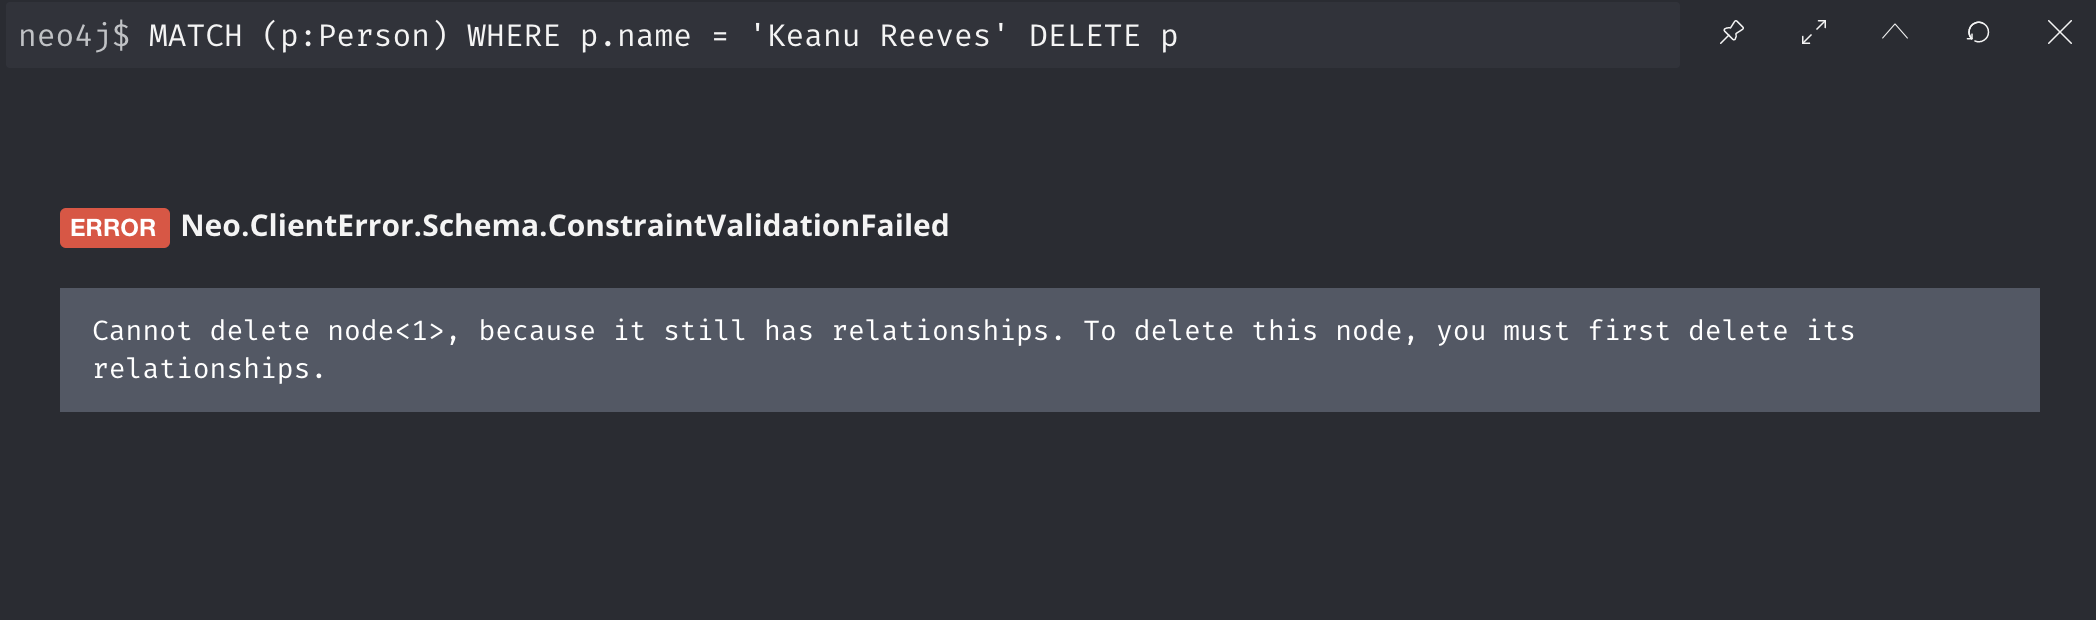

In [2]:
Image('images/keanu_reeves_delete_error.png', width=600)

Here we delete the *Keanu Reeves* node and its relationships to any other nodes,

```
MATCH (p:Person)
WHERE p.name = 'Keanu Reeves'
DETACH DELETE  p
```

#### Merging data in the graph

You can use `MERGE` to either create new nodes and relationships or to make structural changes to existing nodes and relationships.

| If you use `CREATE`,  | The result is,                                                               |
|:----------------------|:-----------------------------------------------------------------------------|
| Node                  | If a node with the same property values exists, a duplicate node is created. |
| Label                 | If the label already exists for the node, the node is not updated.           |
| Property              | If the node or relationship property already exists, it is updated with the new value. If you specify a set of properties to be created using `=` rather than `+=`, existing properties are removed if they are not included in the set.                                                                                   |
| Relationship          | If the relationship exists, a duplicate relationship is created.             |

**!!!** You should never create duplicate nodes or relationships in a graph.

The `MERGE` clause is used to find elements in the graph. If the element is not found, it is created.

You use the MERGE clause to,

- Create a unique node based on label and key information for a property and if it exists, optionally update it.
- Create a unique relationship.
- Create a node and relationship to it uniquely in the context of another node.

#### Using `MERGE` to create nodes

Here is the simplified syntax for the `MERGE` clause for creating a node,

```
MERGE (variable:Label{nodeProperties})
RETURN variable
```

If there is an existing node with Label and nodeProperties found in the graph, no node is created. If, however the node is not found in the graph, then the node is created.

```
MERGE (a:Actor {name: 'Michael Caine'})
SET a.born = 1933
RETURN a
```

#### Using `MERGE` to create relationships

Here is the syntax for the `MERGE` clause for creating relationships,

```
MERGE (variable:Label {nodeProperties})-[:REL_TYPE]->(otherNode)
RETURN variable
```

If there is an existing node with *Label* and *nodeProperties* with the *:REL_TYPE* to *otherNode* found in the graph, no relationship is created. If the relationship does not exist, it is created.

Although, you can leave out the direction of the relationship being created with the `MERGE`, in which case a left-to-right arrow will be assumed, a best practice is to always specify the direction of the relationship. However, if you have bidirectional relationships and you want to avoid creating duplicate relationships, you must leave off the arrow.

#### Specifying creation behavior when merging

You can use the `MERGE` clause, along with `ON CREATE` to assign specific values to a node being created as a result of an attempt to merge.

```
MERGE (a:Person {name: 'Sir Michael Caine'})
ON CREATE SET a.birthPlace = 'London', a.born = 1934
RETURN a
```

We know that there are no existing *Sir Michael Caine* Person nodes. When the `MERGE` executes, it will not find any matching nodes so it will create one and will execute the `ON CREATE` clause where we set the birthplace and born property values.

You can also specify an `ON MATCH` clause during merge processing. If the exact node is found, you can update its properties or labels. Here is an example,

```
MERGE (a:Person {name: 'Sir Michael Caine'})
ON CREATE SET a.born = 1934, a.birthPlace = 'UK'
ON MATCH SET a.birthPlace = 'UK'
RETURN a
```

#### Using `MERGE` to create relationships

Using `MERGE` to create relationships is expensive and you should only do it when you need to ensure that a relationship is unique and you are not sure if it already exists.

In this example, we use the `MATCH` clause to find all *Person* nodes that represent *Michael Caine* and we find the movie, *Batman Begins* that we want to connect to all of these nodes. We already have a connection between one of the *Person* nodes and the *Movie* node. We do not want this relationship to be duplicated. This is where we can use `MERGE` as follows,

```
MATCH (p:Person), (m:Movie)
WHERE m.title = 'Batman Begins' AND p.name ENDS WITH 'Caine'
MERGE (p)-[:ACTED_IN]->(m)
RETURN p, m
```

You must be aware of the behavior of the `MERGE` clause and how it will automatically create nodes and relationships. `MERGE` tries to find a full pattern and if it doesn’t find it, it creates that full pattern. That’s why in most cases you should first `MERGE` your nodes and then your relationship afterwards.

Only if you intentionally want to create a node within the context of another (like a month within a year) then a `MERGE` pattern with one bound and one unbound node makes sense.

```
MERGE (fromDate:Date {year: 2018})<-[:IN_YEAR]-(toDate:Date {month: 'January'})
```

#### QUIZ

**Q1)** What Cypher clauses can you use to create a node?

- &#9745; CREATE
- &#9744; CREATE NODE
- &#9745; MERGE
- &#9744; ADD

**Q2)** Suppose that you have retrieved a node, s with a property, *color*:

```
MATCH (s:Shape {location: [20,30]})
???
RETURN s
```

What Cypher clause do you add here to delete the color property from this node?

- &#9744; DELETE s.color
- &#9745; SET s.color=null
- &#9745; REMOVE s.color
- &#9744; SET s.color=?

**Q3)** Suppose you retrieve a node, n in the graph that is related to other nodes. What Cypher clause do you write to delete this node and its relationships in the graph?

- &#9744; DELETE n
- &#9744; DELETE n WITH RELATIONSHIPS
- &#9744; REMOVE n
- &#9745; DETACH DELETE n